In [29]:
# importing libraries

import warnings, pandas as pd, numpy as np, matplotlib.pyplot as plt, scipy.stats as stats, seaborn as sns
warnings.filterwarnings("ignore")

## Whole brain - 10 subjects

In [2]:
# loading datasets

df10 = pd.read_csv('whole_brain_10subjects.csv')
df10

,subjectID,Age,Sex,Class,Total_Brain_volume,Total_Intracranial_volume,Total_Gray_Matter_volume,Total_White_Matter_volume,Left_Hemisphere_Gray_Matter_volume,Right_Hemisphere_Gray_Matter_volume,Left_Hemisphere_White_Matter_volume,Right_Hemisphere_White_Matter_volume,Left_Hemisphere_Mean_Gray_Matter_thickness,Right_Hemisphere_Mean_Gray_Matter_thickness
0,CC110182,18,F,Young,1162326,1.482955e+06,559124.0587,385691.1652,284302.2641,274821.7946,194885.3681,190805.7971,2.95999,2.91457
1,CC120061,19,M,Young,1386044,1.740782e+06,662151.6838,478257.9095,331925.7546,330225.9291,239216.0566,239041.8529,2.89298,2.83663
2,CC120120,25,M,Young,1195838,1.556700e+06,523856.8156,428647.9846,260847.0710,263009.7446,212869.5405,215778.4441,2.85779,2.84967
3,CC120065,25,F,Young,1152844,1.474839e+06,515818.4360,420715.5358,261876.8398,253941.5962,210698.6841,210016.8517,2.84291,2.75639
4,CC120218,27,F,Young,1124157,1.456570e+06,516075.4036,397269.2457,258451.6486,257623.7550,199073.3458,198195.9000,3.03407,2.99311
5,CC721585,79,F,Old,1124963,1.248712e+06,497103.4301,393439.2132,257671.8925,239431.5376,199931.3347,193507.8785,2.58240,2.45807
6,CC721377,80,M,Old,1144068,9.718431e+05,419692.7642,498384.9799,213164.0338,206528.7304,250641.9777,247743.0022,1.97255,1.91971
7,CC720685,81,M,Old,1216037,1.699862e+06,507536.4578,456208.6962,253011.7046,254524.7532,226871.6685,229337.0276,2.67284,2.63551
8,CC710088,83,F,Old,1011319,2.108118e+06,446216.6841,375181.2099,229494.4284,216722.2557,189223.4577,185957.7522,2.39989,2.29689
9,CC710131,85,M,Old,1425935,1.970941e+06,628391.6327,522986.2562,310877.9328,317513.6999,261230.6030,261755.6531,2.50680,2.53183


In [3]:
# slicing the first 8 columns of the data above

df10 = df10.iloc[:,:8]

In [4]:
# getting the grouped data; with the first 5 for the young and the last 5 corresponds to the old

young_df10 = df10.iloc[:5,:]
old_df10 = df10.iloc[5:,:]

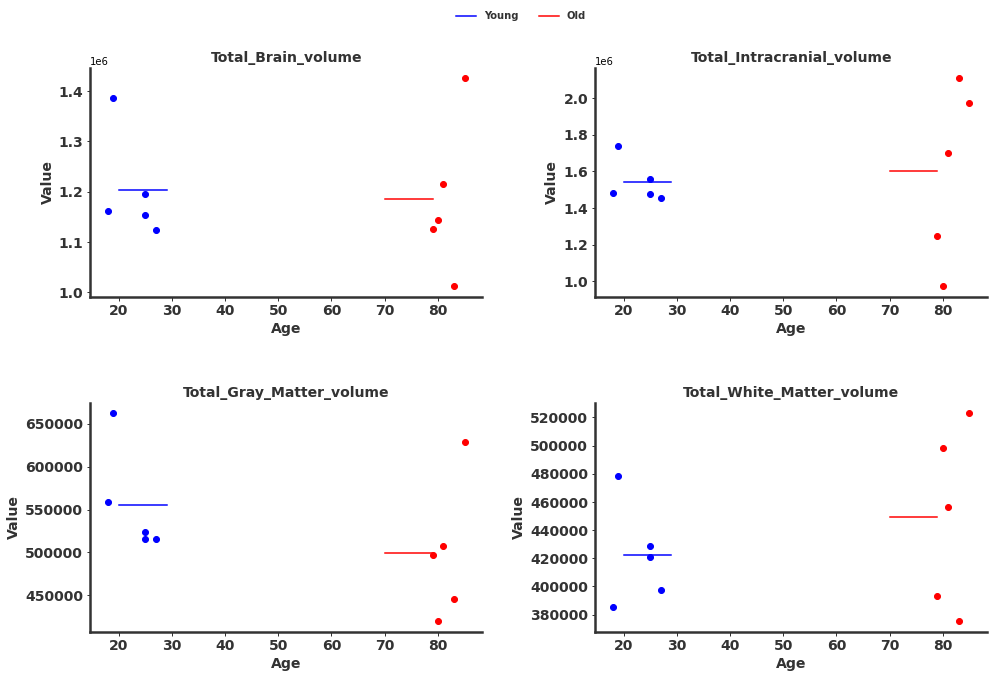

In [5]:
plt.figure(figsize = (15,10))
num = 1
for i in list(df10.columns)[4:]:
    mean_young = young_df10[i].mean()
    mean_old = old_df10[i].mean()
    plt.subplot(2,2, num)
    ax = plt.plot(np.arange(20,30), [mean_young for j in range(0,10)], c = 'blue')
    ax = plt.plot(np.arange(70,80), [mean_old for j in range(0,10)], c = 'red')
    plt.scatter(young_df10['Age'], young_df10[i], c = 'blue', label = 'Young')
    plt.scatter(old_df10['Age'], old_df10[i], c = 'red', label = 'Young')
    plt.xlabel('Age', size = 14, weight = 'bold', color = '0.2')
    plt.ylabel('Value', size = 14, weight = 'bold', color = '0.2')
    plt.title(i, size = 14, ha = 'center', weight = 'bold', color = '0.2')
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(2.5)
        ax.spines[axis].set_color('0.2')
        
    plt.tight_layout(pad=5.0)
    plt.xticks(size = 14, ha = 'center', weight = 'bold', color = '0.2')
    plt.yticks(size = 14, weight = 'bold', color = '0.2')
    num += 1
    
handles, labels = ax.get_legend_handles_labels()

plt.legend(['Young', 'Old'], loc='upper right',ncol = 2, bbox_to_anchor=(0, 2.75), fontsize = 14, labelcolor = '0.2', prop = {'weight': 'bold'}, frameon = False)
plt.show()

## Correlation

In [6]:
# determing the correlations between variables

correlation = df10.corr()
correlation

,Age,Total_Brain_volume,Total_Intracranial_volume,Total_Gray_Matter_volume,Total_White_Matter_volume
Age,1.000000,-0.088460,0.122165,-0.406872,0.283891
Total_Brain_volume,-0.088460,1.000000,0.261430,0.862994,0.779378
Total_Intracranial_volume,0.122165,0.261430,1.000000,0.413501,-0.008694
Total_Gray_Matter_volume,-0.406872,0.862994,0.413501,1.000000,0.371860
Total_White_Matter_volume,0.283891,0.779378,-0.008694,0.371860,1.000000


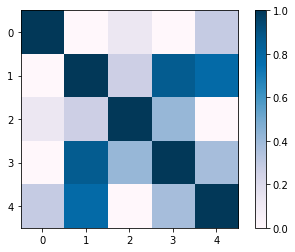

In [7]:
# visualizing the correlation between the variables

plt.imshow(correlation,cmap = 'PuBu', interpolation='nearest', vmin = 0, vmax = 1 )
plt.colorbar()
plt.show();

## Testing signifance

First, if both data satisfies the normality test, the we use the T-test. If it fails, then we use the Mann Whitney U test, which is non-parametric test.

In [8]:
def test_sig(x, y):
    if stats.shapiro(x).pvalue >= 0.05 and stats.shapiro(y).pvalue >= 0.05: #if they are normally distriuted
        print("t-test")
        return stats.ttest_ind(x,y)
    else:
        print("mann-whitney")
        return stats.mannwhitneyu(x, y)

## T-test

### Hypothesis testing
* $H_0$: There is no difference in the brain volume between the young and old
* $H_1$ There is a significant difference between the young and old

In [9]:
for variable in list(df10.columns)[4:]:  # getting the needed columns
    t_statistics, pvalue = test_sig(young_df10.loc[:,variable], old_df10.loc[:,variable])
    print("The p-value for ",variable," is ", pvalue )
    alpha = 0.05
    if pvalue < alpha:
        print("Reject the null hypothesis; there is a significant difference between the ", variable,  " of young and old.")
    else:
        print("Fail to reject the null hypothesis; there is no significant difference between the ", variable,  " of young and old.")
    print('')

mann-whitney
The p-value for  Total_Brain_volume  is  0.8412698412698413
Fail to reject the null hypothesis; there is no significant difference between the  Total_Brain_volume  of young and old.

t-test
The p-value for  Total_Intracranial_volume  is  0.801400181122518
Fail to reject the null hypothesis; there is no significant difference between the  Total_Intracranial_volume  of young and old.

mann-whitney
The p-value for  Total_Gray_Matter_volume  is  0.09523809523809523
Fail to reject the null hypothesis; there is no significant difference between the  Total_Gray_Matter_volume  of young and old.

t-test
The p-value for  Total_White_Matter_volume  is  0.4335175060906197
Fail to reject the null hypothesis; there is no significant difference between the  Total_White_Matter_volume  of young and old.



## Whole brain - 20 subjects

In [10]:
# this dataset contains data of 20 subects

df20 = pd.read_csv('whole_brain_20subjects.csv')

In [11]:
df20 = df20.iloc[:,:8]
df20

,subjectID,Age,Sex,Class,Total_Brain_volume,Total_Intracranial_volume,Total_Gray_Matter_volume,Total_White_Matter_volume
0,CC110182,18,F,Young,1162326,1.482955e+06,559124.0587,385691.1652
1,CC120061,19,M,Young,1386044,1.740782e+06,662151.6838,478257.9095
2,CC120550,19,M,Young,1312774,1.682958e+06,608302.2675,474095.7563
3,CC110033,24,M,Young,1224834,1.588892e+06,558155.2949,444361.6625
4,CC110045,24,F,Young,1214829,1.576294e+06,568008.2512,423049.3380
5,CC120065,25,F,Young,1152844,1.474839e+06,515818.4360,420715.5358
6,CC120120,25,M,Young,1195838,1.556700e+06,523856.8156,428647.9846
7,CC120218,27,F,Young,1124157,1.456570e+06,516075.4036,397269.2457
8,CC120470,28,F,Young,1117267,1.453527e+06,506309.3978,402992.3254
9,CC112141,29,M,Young,1335651,1.704070e+06,587857.6954,495855.8184


In [12]:
young_df20 = df20.iloc[:10,:]
old_df20 = df20.iloc[10:,:]

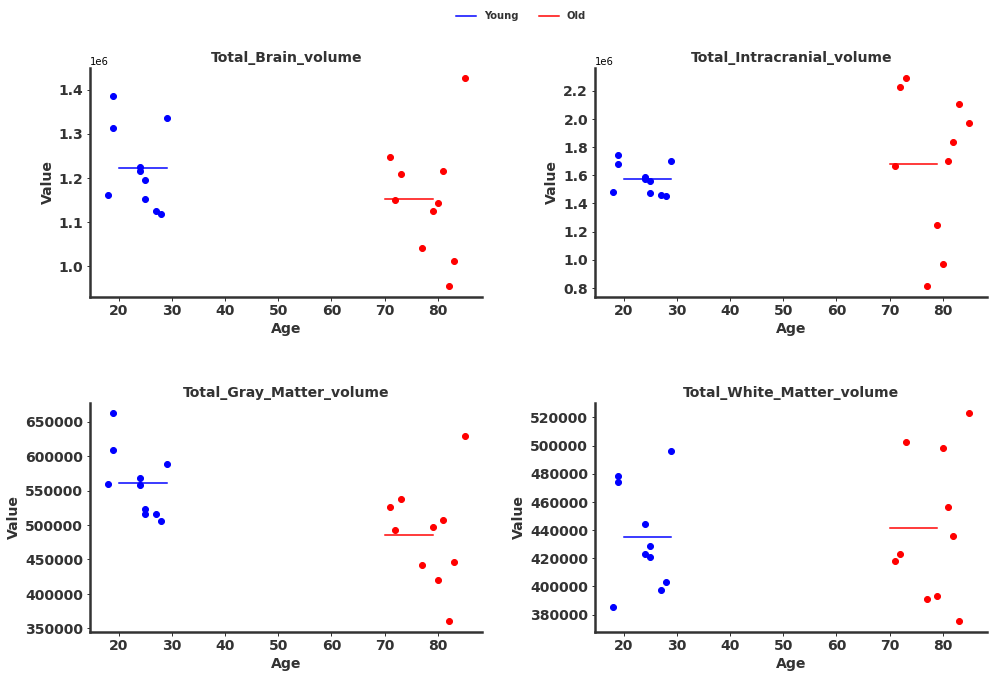

In [13]:
plt.figure(figsize = (15,10))
num = 1
for i in list(df20.columns)[4:]:
    mean_young = young_df20[i].mean()
    mean_old = old_df20[i].mean()
    plt.subplot(2,2, num)
    ax = plt.plot(np.arange(20,30), [mean_young for j in range(0,10)], c = 'blue')
    ax = plt.plot(np.arange(70,80), [mean_old for j in range(0,10)], c = 'red')
    plt.scatter(young_df20['Age'], young_df20[i], c = 'blue', label = 'Young')
    plt.scatter(old_df20['Age'], old_df20[i], c = 'red', label = 'Young')
    plt.xlabel('Age', size = 14, weight = 'bold', color = '0.2')
    plt.ylabel('Value', size = 14, weight = 'bold', color = '0.2')
    plt.title(i, size = 14, ha = 'center', weight = 'bold', color = '0.2')
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(2.5)
        ax.spines[axis].set_color('0.2')
        
    plt.tight_layout(pad=5.0)
    plt.xticks(size = 14, ha = 'center', weight = 'bold', color = '0.2')
    plt.yticks(size = 14, weight = 'bold', color = '0.2')
    num += 1
    
handles, labels = ax.get_legend_handles_labels()

plt.legend(['Young', 'Old'], loc='upper right',ncol = 2, bbox_to_anchor=(0, 2.75), fontsize = 14, labelcolor = '0.2', prop = {'weight': 'bold'}, frameon = False)
plt.show()

In [14]:
for variable in list(df20.columns)[4:]:  # getting the needed columns
    t_statistics, pvalue = test_sig(young_df20.loc[:,variable], old_df20.loc[:,variable])
    print("The p-value for ",variable," is ", pvalue )
    alpha = 0.05
    if pvalue < alpha:
        print("Reject the null hypothesis; there is a significant difference between the ", variable,  " of young and old.")
    else:
        print("Fail to reject the null hypothesis; there is no significant difference between the ", variable,  " of young and old.")
    print('')

t-test
The p-value for  Total_Brain_volume  is  0.19092768559729545
Fail to reject the null hypothesis; there is no significant difference between the  Total_Brain_volume  of young and old.

t-test
The p-value for  Total_Intracranial_volume  is  0.517635872125191
Fail to reject the null hypothesis; there is no significant difference between the  Total_Intracranial_volume  of young and old.

t-test
The p-value for  Total_Gray_Matter_volume  is  0.015687848798141793
Reject the null hypothesis; there is a significant difference between the  Total_Gray_Matter_volume  of young and old.

t-test
The p-value for  Total_White_Matter_volume  is  0.7479330367458574
Fail to reject the null hypothesis; there is no significant difference between the  Total_White_Matter_volume  of young and old.



## Whole brain - 30 subjects

In [15]:
df30 = pd.read_csv('whole_brain_30subjects.csv')

In [16]:
df30 = df30.iloc[:,:8]
df30

,subjectID,Age,Sex,Class,Total_Brain_volume,Total_Intracranial_volume,Total_Gray_Matter_volume,Total_White_Matter_volume
0,CC110182,18,F,Young,1162326,1.482955e+06,559124.0587,385691.1652
1,CC120061,19,M,Young,1386044,1.740782e+06,662151.6838,478257.9095
2,CC120550,19,M,Young,1312774,1.682958e+06,608302.2675,474095.7563
3,CC110126,22,F,Young,1293202,1.640326e+06,601898.0115,479414.3987
4,CC110098,23,M,Young,1303586,1.724172e+06,616815.3399,459879.2821
5,CC110033,24,M,Young,1224834,1.588892e+06,558155.2949,444361.6625
6,CC110045,24,F,Young,1214829,1.576294e+06,568008.2512,423049.3380
7,CC122620,24,F,Young,1102677,1.398785e+06,503672.5741,392041.7856
8,CC120065,25,F,Young,1152844,1.474839e+06,515818.4360,420715.5358
9,CC120120,25,M,Young,1195838,1.556700e+06,523856.8156,428647.9846


In [17]:
# grouping dataset into young and old

young_df30 = df30.iloc[:15,:]
old_df30 = df30.iloc[15:,:]

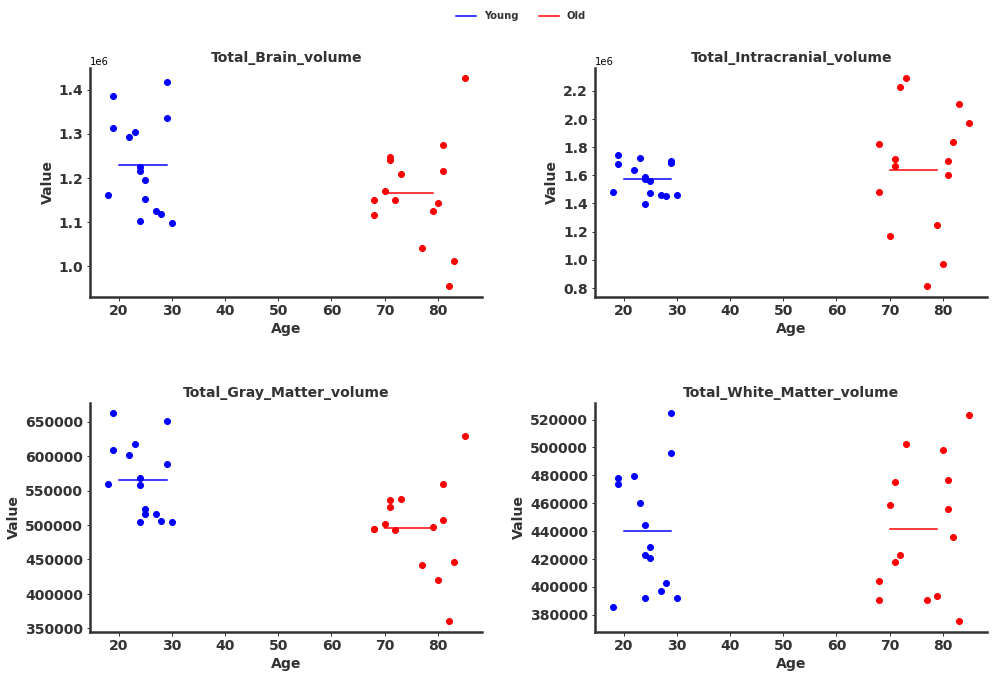

In [18]:
plt.figure(figsize = (15,10))
num = 1
for i in list(df30.columns)[4:]:
    mean_young = young_df30[i].mean()
    mean_old = old_df30[i].mean()
    plt.subplot(2,2, num)
    ax = plt.plot(np.arange(20,30), [mean_young for j in range(0,10)], c = 'blue')
    ax = plt.plot(np.arange(70,80), [mean_old for j in range(0,10)], c = 'red')
    plt.scatter(young_df30['Age'], young_df30[i], c = 'blue', label = 'Young')
    plt.scatter(old_df30['Age'], old_df30[i], c = 'red', label = 'Young')
    plt.xlabel('Age', size = 14, weight = 'bold', color = '0.2')
    plt.ylabel('Value', size = 14, weight = 'bold', color = '0.2')
    plt.title(i, size = 14, ha = 'center', weight = 'bold', color = '0.2')
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(2.5)
        ax.spines[axis].set_color('0.2')
        
    plt.tight_layout(pad=5.0)
    plt.xticks(size = 14, ha = 'center', weight = 'bold', color = '0.2')
    plt.yticks(size = 14, weight = 'bold', color = '0.2')
    num += 1
    
handles, labels = ax.get_legend_handles_labels()

plt.legend(['Young', 'Old'], loc='upper right',ncol = 2, bbox_to_anchor=(0, 2.75), fontsize = 14, labelcolor = '0.2', prop = {'weight': 'bold'}, frameon = False)
plt.savefig('whole_brain_results.png', dpi = 400, bbox_inches = 'tight')
plt.show()

### Brain area means 

In [19]:
for i in list(df30.columns)[4:]:
    mean_young = df30[i][:15].mean()
    mean_old = df30[i][15:].mean()
    print(i)
    print('Young:',mean_young)
    print('Old:',mean_old)
    print('')

Total_Brain_volume
Young: 1229394.3333333333
Old: 1165109.8666666667

Total_Intracranial_volume
Young: 1575012.2386
Old: 1639954.710106667

Total_Gray_Matter_volume
Young: 565552.7810333334
Old: 496323.16110666667

Total_White_Matter_volume
Young: 439907.46038
Old: 441507.9909533333



### Group data description

In [20]:
print("The young group description is ")
young_df30.describe()

The young group description is 


,Total_Brain_volume,Total_Intracranial_volume,Total_Gray_Matter_volume,Total_White_Matter_volume
count,1.500000e+01,1.500000e+01,15.000000,15.000000
mean,1.229394e+06,1.575012e+06,565552.781033,439907.460380
std,1.054991e+05,1.159465e+05,53997.314868,43453.676576
min,1.098591e+06,1.398785e+06,503672.574100,385691.165200
25%,1.138500e+06,1.465704e+06,515946.919800,400130.785550
50%,1.214829e+06,1.576294e+06,559124.058700,428647.984600
75%,1.308180e+06,1.685662e+06,605100.139500,476176.832900
max,1.416295e+06,1.740782e+06,662151.683800,524608.449600


In [28]:
print("The old group description is ")
old_df30.describe()

The old group description is 


,Age,Total_Brain_volume,Total_Intracranial_volume,Total_Gray_Matter_volume,Total_White_Matter_volume
count,15.000000,1.500000e+01,1.500000e+01,15.000000,15.000000
mean,76.066667,1.165110e+06,1.639955e+06,496323.161107,441507.990953
std,5.861090,1.150407e+05,4.395358e+05,63090.210608,46817.928228
min,68.000000,9.543570e+05,8.104301e+05,360187.285000,375181.209900
25%,71.000000,1.120759e+06,1.363142e+06,469648.292050,398928.350150
50%,77.000000,1.150618e+06,1.699862e+06,497103.430100,435712.765000
75%,81.000000,1.228915e+06,1.902383e+06,531246.298300,475926.150750
max,85.000000,1.425935e+06,2.288766e+06,628391.632700,522986.256200


(-114422.55, 2500000.0)

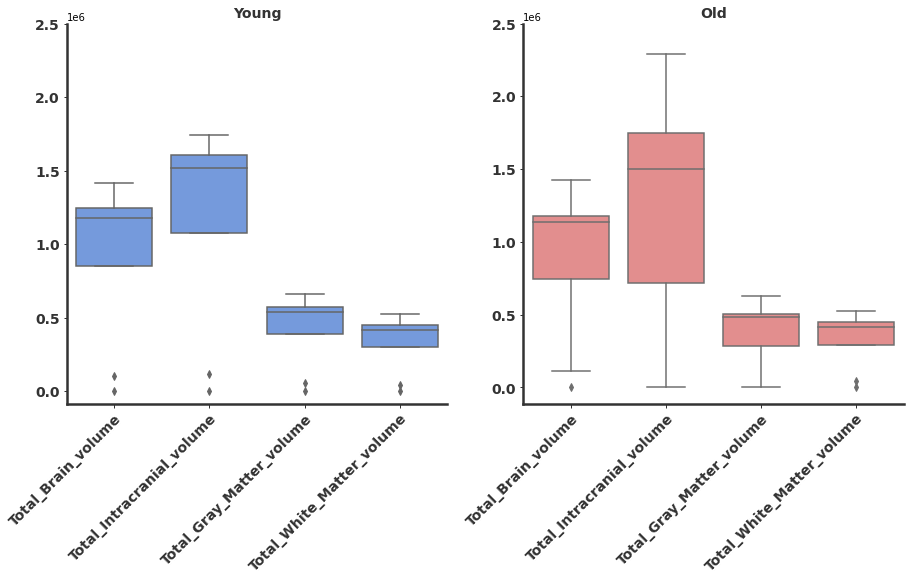

In [27]:
plt.figure(figsize = (15,7))
plt.subplot(121)
sns.boxplot(young_df30.describe().iloc[:,1:], color = 'cornflowerblue')
plt.xticks(rotation = 45, rotation_mode = "anchor", ha = "right", size = 14, weight = 'bold', color = '0.2')
plt.yticks(size = 14, weight = 'bold', color = '0.2')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2.5)
    ax.spines[axis].set_color('0.2')
plt.title("Young", size = 14, ha = 'center', weight = 'bold', color = '0.2')
plt.ylim(top = 2.5e6)

plt.subplot(122)
sns.boxplot(old_df30.describe().iloc[:,1:], color = 'lightcoral')
plt.xticks(rotation = 45, rotation_mode = "anchor", ha = "right", size = 14, weight = 'bold', color = '0.2')
plt.yticks(size = 14, weight = 'bold', color = '0.2')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2.5)
    ax.spines[axis].set_color('0.2')
plt.title("Old", size = 14, ha = 'center', weight = 'bold', color = '0.2')
plt.ylim(top = 2.5e6)

### testing significance

In [24]:
for variable in list(df30.columns)[4:]:  # getting the needed columns
    t_statistics, pvalue = test_sig(young_df30.loc[:,variable], old_df30.loc[:,variable])
    print("The p-value for ",variable," is ", pvalue )
    alpha = 0.05
    if pvalue < alpha:
        print("Reject the null hypothesis; there is a significant difference between the ", variable,  " of young and old.")
    else:
        print("Fail to reject the null hypothesis; there is no significant difference between the ", variable,  " of young and old.")
    print('')

t-test
The p-value for  Total_Brain_volume  is  0.12192852336351287
Fail to reject the null hypothesis; there is no significant difference between the  Total_Brain_volume  of young and old.

t-test
The p-value for  Total_Intracranial_volume  is  0.5844394308585351
Fail to reject the null hypothesis; there is no significant difference between the  Total_Intracranial_volume  of young and old.

t-test
The p-value for  Total_Gray_Matter_volume  is  0.0031657396318077874
Reject the null hypothesis; there is a significant difference between the  Total_Gray_Matter_volume  of young and old.

t-test
The p-value for  Total_White_Matter_volume  is  0.9233821758082537
Fail to reject the null hypothesis; there is no significant difference between the  Total_White_Matter_volume  of young and old.



## Results

* We can only reject the null hypothesis that there is no difference in the Total Gray Matter Volume between the young and old
* This study will be extended to make a comparison between 100 subjects and more to determine the difference between the four regions considered